## Эксполаторный анализ корпуса CMU-MOSEI

Выполнила: Казакова Софья, студентка группы M4121

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [19]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [9]:
data_train = pd.read_csv('Labels/Data_Train_modified.csv')
data_test = pd.read_csv('Labels/Data_Test_modified.csv')
data_val = pd.read_csv('Labels/Data_Val_modified.csv')

data_all = pd.concat([data_train, data_test, data_val])
data_all.head()

,video,start_time,end_time,sentiment,happy,sad,anger,surprise,disgust,fear,text,ASR
0,-3g5yACwYnA,82.7645,100.5550,1.000000,0.666667,0.666667,0.0,0.0,0.0,0.666667,Key is part of the people that we use to solve...,key part of the people that we use the to sel...
1,-3g5yACwYnA,119.9190,125.2990,0.666667,0.000000,0.000000,0.0,0.0,0.0,0.000000,They've been able to find solutions or at leas...,is that we do they have been able to find sol...
2,-3g5yACwYnA,4.8400,13.6315,0.000000,0.666667,0.666667,0.0,0.0,0.0,0.333333,Key Polymer brings a technical aspect to our o...,creations and key brings a keep our brains ar...
3,-3g5yACwYnA,13.6315,27.0310,0.000000,0.333333,0.333333,0.0,0.0,0.0,0.000000,We're a huge user of adhesives for our operati...,we are a huge a user of adhesives for our ope...
4,-3g5yACwYnA,27.0310,41.3000,1.000000,0.666667,0.000000,0.0,0.0,0.0,0.000000,Key brings those types of aspects to a busines...,he brings those types of a aspects to our bus...


In [4]:
data_train.info()
data_train.describe()

#print("Количество уникальных видео:", data_train['video'].nunique())
#print("Количество уникальных текстов:", data_train['ASR'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16274 entries, 0 to 16273
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   video       16274 non-null  object 
 1   start_time  16274 non-null  float64
 2   end_time    16274 non-null  float64
 3   sentiment   16274 non-null  float64
 4   happy       16274 non-null  float64
 5   sad         16274 non-null  float64
 6   anger       16274 non-null  float64
 7   surprise    16274 non-null  float64
 8   disgust     16274 non-null  float64
 9   fear        16274 non-null  float64
 10  text        16274 non-null  object 
 11  ASR         16274 non-null  object 
dtypes: float64(9), object(3)
memory usage: 1.5+ MB


,start_time,end_time,sentiment,happy,sad,anger,surprise,disgust,fear
count,16274.000000,16274.000000,16274.000000,16274.000000,16274.000000,16274.000000,16274.000000,16274.000000,16274.000000
mean,62.644087,69.808617,0.145406,0.486768,0.161259,0.158166,0.048943,0.124667,0.040494
std,76.860260,76.704018,1.125372,0.640150,0.331518,0.367820,0.172161,0.327609,0.151935
min,0.000000,0.391000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.663550,25.125500,-0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.712250,50.039000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82.025000,89.507413,1.000000,0.666667,0.333333,0.000000,0.000000,0.000000,0.000000
max,904.404943,907.045079,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.666667


In [5]:
data_test.info()
data_test.describe()

#print("Количество уникальных видео:", data_test['video'].nunique())
#print("Количество уникальных текстов:", data_test[''].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   video       4653 non-null   object 
 1   start_time  4653 non-null   float64
 2   end_time    4653 non-null   float64
 3   sentiment   4653 non-null   float64
 4   happy       4653 non-null   float64
 5   sad         4653 non-null   float64
 6   anger       4653 non-null   float64
 7   surprise    4653 non-null   float64
 8   disgust     4653 non-null   float64
 9   fear        4653 non-null   float64
 10  text        4653 non-null   object 
 11  ASR         4653 non-null   object 
dtypes: float64(9), object(3)
memory usage: 436.3+ KB


,start_time,end_time,sentiment,happy,sad,anger,surprise,disgust,fear
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,60.157589,67.546424,0.142883,0.470234,0.144674,0.163479,0.044058,0.117379,0.042696
std,66.203621,66.149467,1.109890,0.607638,0.302660,0.360687,0.155756,0.317113,0.156517
min,0.000000,0.286000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.113500,24.706500,-0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.692500,49.062000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
75%,79.781179,87.374000,1.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000
max,611.717120,615.510771,3.000000,3.000000,2.333333,3.000000,2.333333,3.000000,1.333333


In [6]:
data_val.info()
data_val.describe()

#print("Количество уникальных видео:", data_val['video'].nunique())
#print("Количество уникальных текстов:", data_val['ASR'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   video       1861 non-null   object 
 1   start_time  1861 non-null   float64
 2   end_time    1861 non-null   float64
 3   sentiment   1861 non-null   float64
 4   happy       1861 non-null   float64
 5   sad         1861 non-null   float64
 6   anger       1861 non-null   float64
 7   surprise    1861 non-null   float64
 8   disgust     1861 non-null   float64
 9   fear        1861 non-null   float64
 10  text        1861 non-null   object 
 11  ASR         1861 non-null   object 
dtypes: float64(9), object(3)
memory usage: 174.6+ KB


,start_time,end_time,sentiment,happy,sad,anger,surprise,disgust,fear
count,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000
mean,55.844270,63.424406,0.191922,0.440265,0.167562,0.122336,0.049704,0.090095,0.043794
std,64.589996,64.418549,1.038515,0.579338,0.327045,0.304323,0.164479,0.263585,0.152660
min,0.000000,0.601000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.602000,23.361000,-0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.717000,47.925000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.669000,82.619500,0.666667,0.666667,0.333333,0.000000,0.000000,0.000000,0.000000
max,729.772744,739.806077,3.000000,3.000000,3.000000,2.333333,1.666667,2.666667,1.000000


In [7]:
data_all.info()
data_all.describe()

#print("Количество уникальных видео:", data_all['video'].nunique())
#print("Количество уникальных текстов:", data_all['ASR'].nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22788 entries, 0 to 1860
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   video       22788 non-null  object 
 1   start_time  22788 non-null  float64
 2   end_time    22788 non-null  float64
 3   sentiment   22788 non-null  float64
 4   happy       22788 non-null  float64
 5   sad         22788 non-null  float64
 6   anger       22788 non-null  float64
 7   surprise    22788 non-null  float64
 8   disgust     22788 non-null  float64
 9   fear        22788 non-null  float64
 10  text        22788 non-null  object 
 11  ASR         22788 non-null  object 
dtypes: float64(9), object(3)
memory usage: 2.3+ MB


,start_time,end_time,sentiment,happy,sad,anger,surprise,disgust,fear
count,22788.000000,22788.000000,22788.000000,22788.000000,22788.000000,22788.000000,22788.000000,22788.000000,22788.000000
mean,61.581066,68.825336,0.148689,0.479595,0.158387,0.156325,0.048008,0.120356,0.041213
std,73.878092,73.736475,1.115398,0.628968,0.325529,0.361722,0.168320,0.320838,0.152938
min,0.000000,0.286000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.417875,24.923388,-0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.295500,49.699500,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.948500,88.452696,1.000000,0.666667,0.333333,0.000000,0.000000,0.000000,0.000000
max,904.404943,907.045079,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.666667


In [11]:
data_all['class'] = data_all['sentiment'].apply(lambda x: -1 if x < 0 else 1) #(0 if x == 0 else 1))
data_all

,video,start_time,end_time,sentiment,happy,sad,anger,surprise,disgust,fear,text,ASR,class
0,-3g5yACwYnA,82.7645,100.5550,1.000000,0.666667,0.666667,0.0,0.0,0.000000,0.666667,Key is part of the people that we use to solve...,key part of the people that we use the to sel...,1
1,-3g5yACwYnA,119.9190,125.2990,0.666667,0.000000,0.000000,0.0,0.0,0.000000,0.000000,They've been able to find solutions or at leas...,is that we do they have been able to find sol...,1
2,-3g5yACwYnA,4.8400,13.6315,0.000000,0.666667,0.666667,0.0,0.0,0.000000,0.333333,Key Polymer brings a technical aspect to our o...,creations and key brings a keep our brains ar...,1
3,-3g5yACwYnA,13.6315,27.0310,0.000000,0.333333,0.333333,0.0,0.0,0.000000,0.000000,We're a huge user of adhesives for our operati...,we are a huge a user of adhesives for our ope...,1
4,-3g5yACwYnA,27.0310,41.3000,1.000000,0.666667,0.000000,0.0,0.0,0.000000,0.000000,Key brings those types of aspects to a busines...,he brings those types of a aspects to our bus...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,zjYEBwXGD8I,54.2245,60.8340,1.333333,0.000000,0.000000,0.0,0.0,0.000000,0.000000,"Unlike some other companies, Frontpoint has d...",unlike some other companies from point has do...,1
1857,zjYEBwXGD8I,60.8340,62.5505,0.333333,0.333333,0.000000,0.0,0.0,0.000000,0.000000,You can see all of them on their website,you can see all of them on their website,1
1858,zjYEBwXGD8I,62.5505,69.4450,0.333333,0.333333,0.000000,0.0,0.0,0.000000,0.000000,They also offer a 30-day money-back guarantee...,they also offer a thirty day money back guara...,1
1859,zk2jTlAtvSU,24.4060,35.4630,0.000000,0.333333,0.000000,0.0,0.0,0.000000,0.333333,They differ from the articles of incorporation...,they differ from the articles of incorporatio...,1


array([[<Axes: title={'center': 'sentiment'}>]], dtype=object)

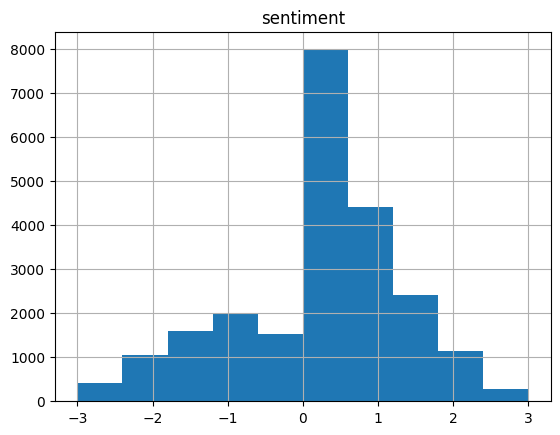

In [9]:
data_all.hist(column='sentiment')

array([[<Axes: title={'center': 'sentiment'}>]], dtype=object)

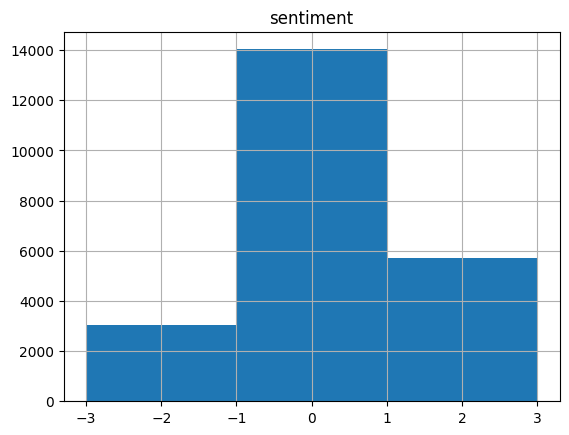

In [10]:
data_all.hist(column='sentiment', bins=3)

array([[<Axes: title={'center': 'sentiment'}>]], dtype=object)

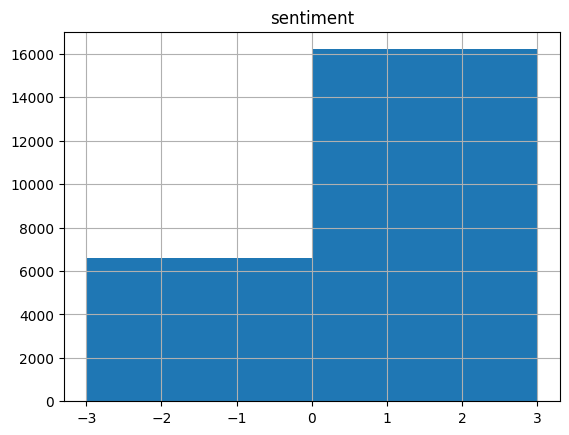

In [11]:
data_all.hist(column='sentiment', bins=2)

array([[<Axes: title={'center': 'class'}>]], dtype=object)

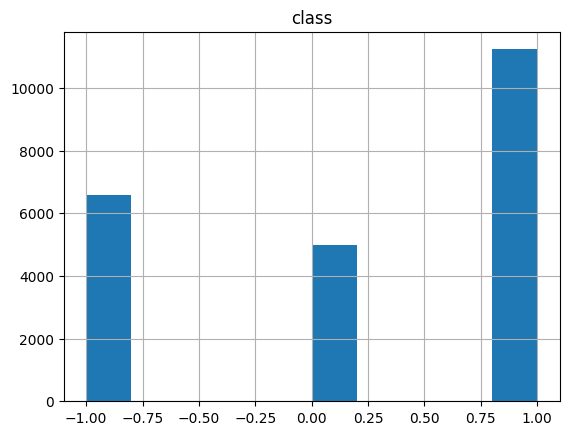

In [12]:
data_all.hist(column='class')

In [13]:
data_train['class'] = data_train['sentiment'].apply(lambda x: -1 if x < 0 else 1)# (0 if x == 0 else 1))
data_test['class'] = data_test['sentiment'].apply(lambda x: -1 if x < 0 else 1)#(0 if x == 0 else 1))
data_val['class'] = data_val['sentiment'].apply(lambda x: -1 if x < 0 else 1)#(0 if x == 0 else 1))

array([[<Axes: title={'center': 'class'}>]], dtype=object)

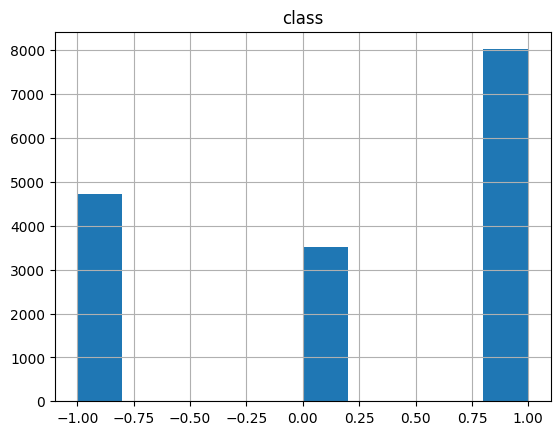

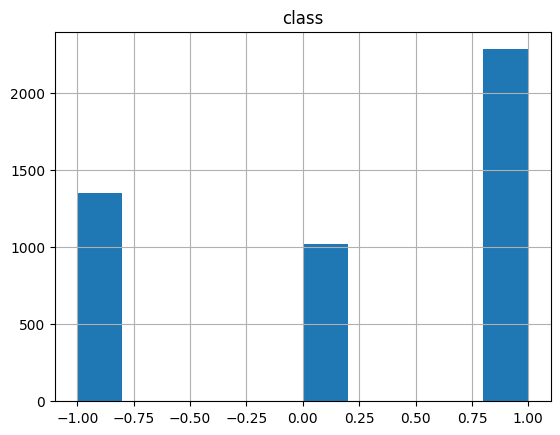

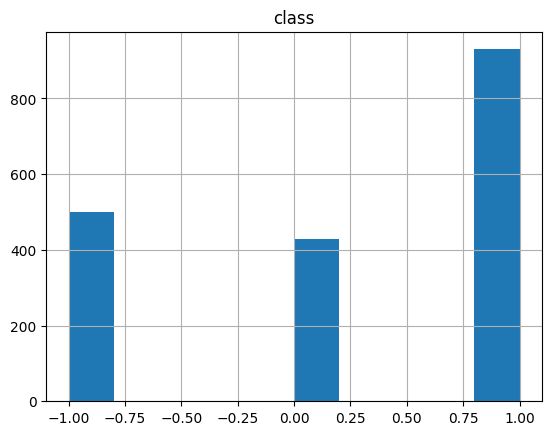

In [14]:
data_train.hist(column='class')
data_test.hist(column='class')
data_val.hist(column='class')

In [15]:
data_all['duration'] = data_all['end_time'] - data_all['start_time']
data_all

,video,start_time,end_time,sentiment,happy,sad,anger,surprise,disgust,fear,text,ASR,class,duration
0,-3g5yACwYnA,82.7645,100.5550,1.000000,0.666667,0.666667,0.0,0.0,0.000000,0.666667,Key is part of the people that we use to solve...,key part of the people that we use the to sel...,1,17.7905
1,-3g5yACwYnA,119.9190,125.2990,0.666667,0.000000,0.000000,0.0,0.0,0.000000,0.000000,They've been able to find solutions or at leas...,is that we do they have been able to find sol...,1,5.3800
2,-3g5yACwYnA,4.8400,13.6315,0.000000,0.666667,0.666667,0.0,0.0,0.000000,0.333333,Key Polymer brings a technical aspect to our o...,creations and key brings a keep our brains ar...,0,8.7915
3,-3g5yACwYnA,13.6315,27.0310,0.000000,0.333333,0.333333,0.0,0.0,0.000000,0.000000,We're a huge user of adhesives for our operati...,we are a huge a user of adhesives for our ope...,0,13.3995
4,-3g5yACwYnA,27.0310,41.3000,1.000000,0.666667,0.000000,0.0,0.0,0.000000,0.000000,Key brings those types of aspects to a busines...,he brings those types of a aspects to our bus...,1,14.2690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,zjYEBwXGD8I,54.2245,60.8340,1.333333,0.000000,0.000000,0.0,0.0,0.000000,0.000000,"Unlike some other companies, Frontpoint has d...",unlike some other companies from point has do...,1,6.6095
1857,zjYEBwXGD8I,60.8340,62.5505,0.333333,0.333333,0.000000,0.0,0.0,0.000000,0.000000,You can see all of them on their website,you can see all of them on their website,1,1.7165
1858,zjYEBwXGD8I,62.5505,69.4450,0.333333,0.333333,0.000000,0.0,0.0,0.000000,0.000000,They also offer a 30-day money-back guarantee...,they also offer a thirty day money back guara...,1,6.8945
1859,zk2jTlAtvSU,24.4060,35.4630,0.000000,0.333333,0.000000,0.0,0.0,0.000000,0.333333,They differ from the articles of incorporation...,they differ from the articles of incorporatio...,0,11.0570


/tmp/ipykernel_34077/4084007229.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_all.corr()


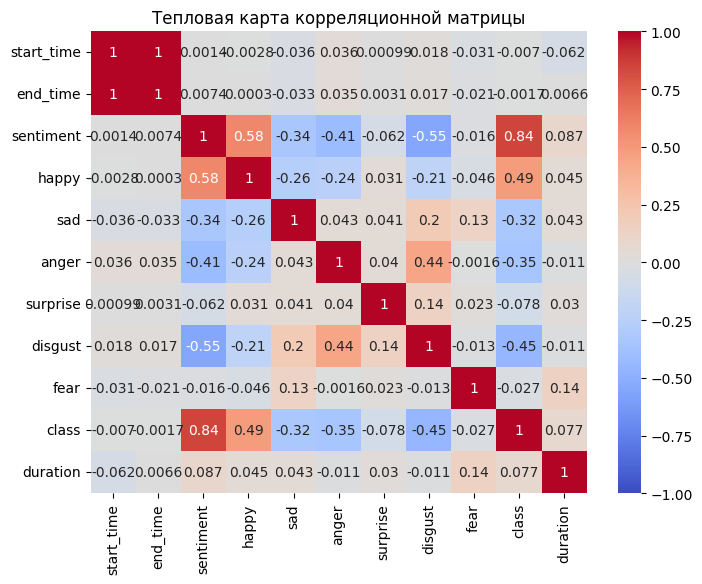

In [16]:
corr_matrix = data_all.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Тепловая карта корреляционной матрицы')
plt.show()

## Baseline для двухклассового сентимента

### Word2Vec эмбеддинги – текст

In [17]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from string import punctuation 
nltk.download('stopwords')
nltk.download('wordnet')

import numpy as np
import gensim
import torch

[nltk_data] Downloading package stopwords to /home/ext-
[nltk_data]     kazakova-s@ad.speechpro.com/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ext-
[nltk_data]     kazakova-s@ad.speechpro.com/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [45]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.remove('no')
stopwords.remove('nor')
stopwords.append("'s")
#print(stopwords)

punctuations = list(punctuation)

ps = PorterStemmer() 
lemmatizer = WordNetLemmatizer() 

def tokenize(orig_text):
    tokenized = nltk.word_tokenize(orig_text)
    #print(tokenized)
    preprocess = [i.lower() for i in tokenized if (i not in stopwords) and (i not in punctuations)]
    #print(preprocess)
    stem = [ps.stem(i) for i in preprocess]
    #print(stem)
    lem = [lemmatizer.lemmatize(i) for i in stem]
    #print(lem)
    return lem

In [46]:
train_data = data_train["text"]
val_data = data_val["text"]
test_data = data_test["text"]

train_tokens = [tokenize(t) for t in train_data] 
val_tokens = [tokenize(t) for t in val_data] 
test_tokens = [tokenize(t) for t in test_data] 

In [20]:
train_data[0]

"Key is part of the people that we use to solve those issues, whether it's stretch or outdoor resistance or abrasions or different technical aspects that we really need to solve to get into new markets, they've been able to bring solutions."

In [21]:
train_tokens[0]

['key',
 'part',
 'peopl',
 'use',
 'solv',
 'issu',
 'whether',
 'stretch',
 'outdoor',
 'resist',
 'abras',
 'differ',
 'technic',
 'aspect',
 'realli',
 'need',
 'solv',
 'get',
 'new',
 'market',
 "'ve",
 'abl',
 'bring',
 'solut']

In [22]:
from gensim.models import Word2Vec

X_token = train_tokens + val_tokens + test_tokens

W2V_model = Word2Vec(sentences=X_token, window=5, min_count=1, workers=4, vector_size=500)
W2V_model.save("word2vec.model")

W2V_model.train(X_token, total_examples=W2V_model.corpus_count, epochs=300, report_delay=1)

(67930031, 76865400)

In [23]:
def word_averaging(model, words):
    all_words, mean = set(), []
    
    for word in words:
        mean.append(W2V_model.wv[word])
        all_words.add(word)

    if not mean:
        #logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(model.vector_size)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(model, text_list):
    return np.vstack([word_averaging(model, comment_text) for comment_text in text_list ])

In [24]:
word_vectors = W2V_model.wv
X_train_W2V = word_averaging_list(W2V_model, train_tokens) #(16274, 500)
X_val_W2V = word_averaging_list(W2V_model, val_tokens) #(1861, 500)
X_test_W2V = word_averaging_list(W2V_model, test_tokens) #(4653, 500)

In [25]:
type(X_test_W2V)

numpy.ndarray

In [26]:
X_train_W2V_df = pd.DataFrame(X_train_W2V)
X_train_W2V_df.to_csv("X_train_W2V.csv")

X_val_W2V_df = pd.DataFrame(X_val_W2V)
X_val_W2V_df.to_csv("X_val_W2V.csv")

X_test_W2V_df = pd.DataFrame(X_test_W2V)
X_test_W2V_df.to_csv("X_test_W2V.csv")

### BERT эмбеддинги  – текст (не удалось воспользоваться, слишком длинные тексты)

In [52]:
max_len = 0

# For every sentence...
for sent in val_data:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))
    
    if len(input_ids)==422:
        print(sent)

print('Max sentence length: ', max_len)

Harry Potter and the Order of the Phoenix yes Harry Potter's back and I think he's forty seven in this one no no he's not that old but (stutter) he's starting to look old in the movies they're all starting to look all grown up, and (umm) I'll admit it that I'm I'm (stutter) a dork and I enjoy the Harry Potter movies not saying everybody that enjoys Harry Potter movie is necessarily a dork, but (umm) I'm an older gentleman and I enjoy the kid movies but (umm) it's a very good movie (stutter) I mean the the the (stutter) movies in general are very good they the first one was really good the second one was still pretty good, and they just went on downhill from down there, this one wasn't very good I mean I didn't think it was that good (umm) Harry's back in school yet again and I think this is his fifth year, and (umm) this time new people are taking over Hogwart the school, see I told you I'm a dork I know the names of the school, and (umm) they're trying to discredit Harry saying that L

In [27]:
from transformers import BertTokenizer, BertModel

In [28]:
input_ids_train = []
attention_masks_train = []

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# For every sentence...
for sent in train_data:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        truncation=True, 
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids_train.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_train.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids_train = torch.cat(input_ids_train, dim=0)
attention_masks_train = torch.cat(attention_masks_train, dim=0)
labels = torch.tensor(data_train['class'])

# Print sentence 0, now as a list of IDs.
print('Original: ', train_data[0])
print('Token IDs:', input_ids_train[0])

/home/ext-kazakova-s@ad.speechpro.com/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2372: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  Key is part of the people that we use to solve those issues, whether it's stretch or outdoor resistance or abrasions or different technical aspects that we really need to solve to get into new markets, they've been able to bring solutions.
Token IDs: tensor([  101,  3145,  2003,  2112,  1997,  1996,  2111,  2008,  2057,  2224,
         2000,  9611,  2216,  3314,  1010,  3251,  2009,  1005,  1055,  7683,
         2030,  7254,  5012,  2030, 11113,  8180,  8496,  2030,  2367,  4087,
         5919,  2008,  2057,  2428,  2342,  2000,  9611,  2000,  2131,  2046,
         2047,  6089,  1010,  2027,  1005,  2310,  2042,  2583,  2000,  3288,
         7300,  1012,   102,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])


In [29]:
input_ids_val = []
attention_masks_val = []

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

for sent in val_data:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        truncation=True, 
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    input_ids_val.append(encoded_dict['input_ids'])
    attention_masks_val.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids_val = torch.cat(input_ids_val, dim=0)
attention_masks_val = torch.cat(attention_masks_val, dim=0)
labels = torch.tensor(data_train['class'])

# Print sentence 0, now as a list of IDs.
print('Original: ', val_data[0])
print('Token IDs:', input_ids_val[0])

Original:  I see that a writer is somebody who has an incredible command of mechanics of the English language.
Token IDs: tensor([ 101, 1045, 2156, 2008, 1037, 3213, 2003, 8307, 2040, 2038, 2019, 9788,
        3094, 1997, 9760, 1997, 1996, 2394, 2653, 1012,  102,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0])


In [30]:
input_ids_test = []
attention_masks_test = []

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

for sent in test_data:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        truncation=True, 
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    input_ids_test.append(encoded_dict['input_ids'])
    attention_masks_test.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids_test = torch.cat(input_ids_test, dim=0)
attention_masks_test = torch.cat(attention_masks_test, dim=0)
labels = torch.tensor(data_train['class'])

# Print sentence 0, now as a list of IDs.
print('Original: ', val_data[0])
print('Token IDs:', input_ids_test[0])

Original:  I see that a writer is somebody who has an incredible command of mechanics of the English language.
Token IDs: tensor([ 101, 1998, 2009, 1005, 1055, 1037, 5075, 2925, 2008, 2064, 4821, 2357,
        1999, 2000, 2019, 3318, 2005, 2017, 2043, 2017, 2053, 2936, 2031, 2019,
        3318, 1998, 2017, 1005, 2128, 3929, 3394, 1012,  102,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0])


In [31]:
bert_model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )
bert_model.eval()
bert_model = bert_model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [32]:
segments_tensors_train = torch.ones([input_ids_train.shape[0], input_ids_train.shape[1]], dtype=torch.float64, device=device)
segments_tensors_val = torch.ones([input_ids_val.shape[0], input_ids_val.shape[1]], dtype=torch.float64, device=device)
segments_tensors_test = torch.ones([input_ids_test.shape[0], input_ids_test.shape[1]], dtype=torch.float64, device=device)

In [33]:
with torch.no_grad():

    outputs = bert_model(input_ids_val.to(device), segments_tensors_val)

    hidden_states = outputs[2]
    
    #This object has four dimensions, in the following order:

    #The layer number (13 layers)
    #The batch number (1 sentence)
    #The word / token number (22 tokens in our sentence)
    #The hidden unit / feature number (768 features)

In [34]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("Number of batches:", len(hidden_states[layer_i]))
batch_i = 0

print ("Number of tokens:", len(hidden_states[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(hidden_states[layer_i][batch_i][token_i]))

Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 1861
Number of tokens: 64
Number of hidden units: 768


In [35]:
token_val_embeddings = hidden_states[12]

type(token_val_embeddings)#.size()

torch.Tensor

In [36]:
k = token_val_embeddings.reshape([1861, 49152])
k.shape

torch.Size([1861, 49152])

In [37]:
k = k.cpu().numpy()
k.shape

(1861, 49152)

In [38]:
df_val = pd.DataFrame(k)

In [39]:
df_val

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,-0.550560,0.313060,0.354480,0.436317,-0.242071,-0.262438,0.921951,0.126570,0.388944,-0.210403,...,-0.441330,0.224882,-0.303859,-0.118725,0.694553,-0.731000,0.316075,-0.773029,-0.088003,-1.277538
1,-0.649337,0.127620,0.272445,0.466535,-0.476165,-0.395875,0.821147,-0.049700,0.336631,-0.256662,...,-0.454751,0.282784,-0.304926,-0.158774,0.641650,-0.667294,0.319171,-0.692640,-0.019823,-1.272298
2,-0.523233,0.028205,0.202555,0.394419,-0.397249,-0.237496,0.736726,-0.033705,0.050081,-0.112454,...,-0.635026,0.170132,-0.263376,-0.090191,0.644163,-0.886386,0.375790,-0.701407,-0.103844,-1.353276
3,-0.199987,-0.126841,0.329780,0.268862,-0.218722,-0.651741,0.608277,0.407206,-0.076963,-0.403960,...,-0.447932,0.225749,-0.218884,0.404097,0.464359,-1.181074,0.346540,-0.722542,0.103049,-1.345987
4,-0.436904,0.223642,0.358217,0.506201,-0.071741,-0.224195,0.919221,0.022270,0.290951,-0.016394,...,-0.355791,0.226587,-0.377569,-0.073847,0.573838,-0.751911,0.215818,-0.722706,-0.011074,-1.156616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,-0.500754,0.260176,0.283819,0.484890,-0.296086,-0.310782,0.780728,-0.023649,0.064034,-0.062107,...,-0.491732,0.257259,-0.241131,-0.074747,0.718976,-0.796932,0.274469,-0.689587,-0.028654,-1.325947
1857,-0.278221,0.199116,0.298489,0.377040,-0.178918,-0.229012,0.632681,0.137641,-0.104629,-0.294179,...,-0.159770,0.025371,-0.355416,0.049205,0.510205,-0.657173,0.181914,-0.450592,0.122027,-0.977060
1858,-0.459474,0.200550,0.286435,0.394718,-0.221635,-0.299324,0.864540,0.031527,-0.104986,-0.321094,...,-0.492980,0.059356,-0.315311,0.031197,0.680500,-0.855623,0.241722,-0.627452,0.044829,-1.294628
1859,-0.531532,0.165375,0.104058,0.342108,-0.187337,-0.146712,0.718674,-0.116864,0.194132,0.089779,...,-0.558635,0.228037,-0.240656,-0.050197,0.554048,-0.982106,0.334031,-0.659382,-0.001651,-1.262481


In [40]:
df_val.to_csv("X_val_BERT.csv", index=False)

In [60]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        out_len = 49152
        
        self.kernel = 5
        self.stride = 2
        
        self.conv1 = nn.Conv2d(1, 5, self.kernel, self.stride)
        out_len = (out_len - self.kernel)//self.stride + 1 #24574
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(5, 10, self.kernel)
        out_len = (out_len - self.kernel)//self.stride + 1  #12285
        
        self.fc1 = nn.Linear(out_len, 6000)
        self.fc2 = nn.Linear(6000, 500)
        
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()

### FastText эмбеддинги  – текст

In [54]:
from gensim.models import FastText
FT_model = FastText(vector_size=500, window=5, min_count=1, sentences=X_token)
FT_model.save("FT.model")


In [55]:
FT_model.train(X_token, total_examples=FT_model.corpus_count, epochs=300, report_delay=1)  

(67935884, 76865400)

In [56]:
word_vectors = FT_model.wv
X_train_FT = word_averaging_list(FT_model, train_tokens) #(16274, 500)
X_val_FT = word_averaging_list(FT_model, val_tokens) #(1861, 500)
X_test_FT = word_averaging_list(FT_model, test_tokens) #(4653, 500)

In [59]:
X_train_FT_df = pd.DataFrame(X_train_FT)
X_train_FT_df.to_csv("X_train_FT.csv")

X_val_FT_df = pd.DataFrame(X_val_FT)
X_val_FT_df.to_csv("X_val_FT.csv")

X_test_FT_df = pd.DataFrame(X_test_FT)
X_test_FT_df.to_csv("X_test_FT.csv")

### MFCC эмбеддинги – аудио (слишком тяжелые)

In [18]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T
import os
import random
import librosa
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def plot_waveform(waveform, sr, title="Waveform"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sr

    figure, axes = plt.subplots(num_channels, 1)
    axes.plot(time_axis, waveform[0], linewidth=1)
    axes.grid(True)
    figure.suptitle(title)
    plt.show(block=False)


def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)


def plot_fbank(fbank, title=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Filter bank")
    axs.imshow(fbank, aspect="auto")
    axs.set_ylabel("frequency bin")
    axs.set_xlabel("mel bin")
    plt.show(block=False)

In [26]:
sample_rate = 16000

In [19]:
train_folder = "/Users/sophia/Downloads/CMU-MOSEI/Audio_chunk/Train_modified"
test_folder = "/Users/sophia/Downloads/CMU-MOSEI/Audio_chunk/Test_modified"
val_folder = "/Users/sophia/Downloads/CMU-MOSEI/Audio_chunk/Val_modified"

In [27]:
files = os.listdir(train_folder)
filename = random.choice(files)
filename

waveform, sample_rate = torchaudio.load(os.path.join(train_folder, filename))
waveform = waveform.to(device)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sophia/Downloads/CMU-MOSEI/Audio_chunk/Train_modified'

In [33]:
waveform, sample_rate = torchaudio.load(os.path.join(train_folder, filename), normalize=True)
transform = T.MFCC(sample_rate=sample_rate, n_mfcc=13, melkwargs={"n_fft": 2048, "hop_length": 1024, "n_mels": 23, "center": False})
mfcc = transform(waveform)

In [37]:
mfcc = mfcc.squeeze()
mfcc = mfcc.reshape([mfcc.shape[0]*mfcc.shape[1]])
mfcc.shape

torch.Size([1495])

In [67]:
files_train = os.listdir(train_folder)
files_val = os.listdir(val_folder)
files_test = os.listdir(test_folder)

In [69]:
mfcc_emb_train = []
for file in files_train:
    waveform, sample_rate = torchaudio.load(os.path.join(train_folder, file), normalize=True)
    transform = T.MFCC(sample_rate=sample_rate, n_mfcc=13, melkwargs={"n_fft": 2048, "hop_length": 1024, "n_mels": 23, "center": False})
    mfcc = transform(waveform)
    mfcc = mfcc.squeeze()
    mfcc = mfcc.reshape([mfcc.shape[0]*mfcc.shape[1]])
    #print(mfcc.shape)
    #break
    mfcc_emb_train.append(mfcc.tolist())
    #print(mfcc_emb_train)
    #break
    
mfcc_emb_val = []
for file in files_val:
    waveform, sample_rate = torchaudio.load(os.path.join(val_folder, file), normalize=True)
    transform = T.MFCC(sample_rate=sample_rate, n_mfcc=13, melkwargs={"n_fft": 2048, "hop_length": 1024, "n_mels": 23, "center": False})
    mfcc = transform(waveform)
    mfcc = mfcc.squeeze()
    mfcc = mfcc.reshape([mfcc.shape[0]*mfcc.shape[1]])
    mfcc_emb_val.append(mfcc.tolist())
    
mfcc_emb_test = []
for file in files_test:
    waveform, sample_rate = torchaudio.load(os.path.join(test_folder, file), normalize=True)
    transform = T.MFCC(sample_rate=sample_rate, n_mfcc=13, melkwargs={"n_fft": 2048, "hop_length": 1024, "n_mels": 23, "center": False})
    mfcc = transform(waveform)
    mfcc = mfcc.squeeze()
    mfcc = mfcc.reshape([mfcc.shape[0]*mfcc.shape[1]])
    mfcc_emb_test.append(mfcc.tolist())

In [70]:
X_train_MFCC_df = pd.DataFrame(mfcc_emb_train)
X_train_MFCC_df.to_csv("X_train_MFCC.csv")

X_val_MFCC_df = pd.DataFrame(mfcc_emb_val)
X_val_MFCC_df.to_csv("X_val_MFCC.csv")

X_test_MFCC_df = pd.DataFrame(mfcc_emb_test)
X_test_MFCC_df.to_csv("X_test_MFCC.csv")

### MFCC по-другому (по рекомендации А. Зорькиной) - еще тяжелее

In [21]:
from tqdm import tqdm
import librosa.feature as Ft

In [ ]:
def extract_log_mel_feats(path_to_files:str, sr:int, n_fft:int,
                          hop_length:int, n_mels:int):
    """
    Extract features from given files and store them in binary format.

    :param path_to_files: path to loaded data
    :param out_path: path to store extracted features
    :param sr: input files sample rate
    :param n_fft: size of fft window
    :param hop_length: hop size
    :param n_mels: number of mel band

    :return:
    """

    feats = []
    
    for i, file_name in tqdm(enumerate(os.listdir(path_to_files))):
        
        if file_name.endswith('.wav'):
            
            wav_data, sr = librosa.load(os.path.join(path_to_files, file_name), sr=sr)
            if len(wav_data) == 0:
                wav_data = np.zeros(sr)
            mel_spec = Ft.melspectrogram(
                y=wav_data,
                n_fft=n_fft,
                hop_length=hop_length,
                n_mels=n_mels,
                fmax=sr // 2
            )
            log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
            feats.append(log_mel_spec)
            '''feats.append({
                'fname': file_name,
                'feature': log_mel_spec,
            })'''

    #pickle.dump(feats, open(out_path, 'wb'))

    return feats

In [ ]:
# feature extraction parameters
sample_rate = 16000
n_fft = 1024
overlap = 4
hop_length = n_fft // overlap
n_mels = 64

In [ ]:
#extract train feats
X_train_MFCC = extract_log_mel_feats(
    train_folder, 
    sample_rate, 
    n_fft, 
    hop_length, 
    n_mels
)

#extract test feats
X_test_MFCC = extract_log_mel_feats(
    test_folder, 
    sample_rate, 
    n_fft, 
    hop_length, 
    n_mels
)

#extract val feats
X_val_MFCC = extract_log_mel_feats(
    val_folder, 
    sample_rate, 
    n_fft, 
    hop_length, 
    n_mels
)

In [17]:
test = [str(i) for i in range(25649, 29199) if i not in [29198]]
test

['25649',
 '25650',
 '25651',
 '25652',
 '25653',
 '25654',
 '25655',
 '25656',
 '25657',
 '25658',
 '25659',
 '25660',
 '25661',
 '25662',
 '25663',
 '25664',
 '25665',
 '25666',
 '25667',
 '25668',
 '25669',
 '25670',
 '25671',
 '25672',
 '25673',
 '25674',
 '25675',
 '25676',
 '25677',
 '25678',
 '25679',
 '25680',
 '25681',
 '25682',
 '25683',
 '25684',
 '25685',
 '25686',
 '25687',
 '25688',
 '25689',
 '25690',
 '25691',
 '25692',
 '25693',
 '25694',
 '25695',
 '25696',
 '25697',
 '25698',
 '25699',
 '25700',
 '25701',
 '25702',
 '25703',
 '25704',
 '25705',
 '25706',
 '25707',
 '25708',
 '25709',
 '25710',
 '25711',
 '25712',
 '25713',
 '25714',
 '25715',
 '25716',
 '25717',
 '25718',
 '25719',
 '25720',
 '25721',
 '25722',
 '25723',
 '25724',
 '25725',
 '25726',
 '25727',
 '25728',
 '25729',
 '25730',
 '25731',
 '25732',
 '25733',
 '25734',
 '25735',
 '25736',
 '25737',
 '25738',
 '25739',
 '25740',
 '25741',
 '25742',
 '25743',
 '25744',
 '25745',
 '25746',
 '25747',
 '25748',


In [18]:
X_test_MFCC_df.drop(test, axis=1).shape

(4653, 25649)

In [19]:
X_test_MFCC_df_cut = X_test_MFCC_df.drop(test, axis=1)
X_test_MFCC_df_cut.shape

(4653, 25649)

In [20]:
X_test_MFCC_df_cut.to_csv("X_test_MFCC_cut.csv")

In [21]:
train = [str(i) for i in range(25649, 30473) if i not in [30472]]
train

['25649',
 '25650',
 '25651',
 '25652',
 '25653',
 '25654',
 '25655',
 '25656',
 '25657',
 '25658',
 '25659',
 '25660',
 '25661',
 '25662',
 '25663',
 '25664',
 '25665',
 '25666',
 '25667',
 '25668',
 '25669',
 '25670',
 '25671',
 '25672',
 '25673',
 '25674',
 '25675',
 '25676',
 '25677',
 '25678',
 '25679',
 '25680',
 '25681',
 '25682',
 '25683',
 '25684',
 '25685',
 '25686',
 '25687',
 '25688',
 '25689',
 '25690',
 '25691',
 '25692',
 '25693',
 '25694',
 '25695',
 '25696',
 '25697',
 '25698',
 '25699',
 '25700',
 '25701',
 '25702',
 '25703',
 '25704',
 '25705',
 '25706',
 '25707',
 '25708',
 '25709',
 '25710',
 '25711',
 '25712',
 '25713',
 '25714',
 '25715',
 '25716',
 '25717',
 '25718',
 '25719',
 '25720',
 '25721',
 '25722',
 '25723',
 '25724',
 '25725',
 '25726',
 '25727',
 '25728',
 '25729',
 '25730',
 '25731',
 '25732',
 '25733',
 '25734',
 '25735',
 '25736',
 '25737',
 '25738',
 '25739',
 '25740',
 '25741',
 '25742',
 '25743',
 '25744',
 '25745',
 '25746',
 '25747',
 '25748',


In [22]:
X_train_MFCC_df_cut = X_train_MFCC_df.drop(train, axis=1)
X_train_MFCC_df_cut.shape

(16274, 25649)

In [23]:
X_train_MFCC_df_cut.to_csv("X_train_MFCC_cut.csv")

### Загрузка признаков

In [3]:
import pandas as pd

In [29]:
data_train = pd.read_csv('Labels/Data_Train_modified.csv')
data_test = pd.read_csv('Labels/Data_Test_modified.csv')
data_val = pd.read_csv('Labels/Data_Val_modified.csv')

data_train['class'] = data_train['sentiment'].apply(lambda x: 0 if x < 0 else 1)# (0 if x == 0 else 1))
data_test['class'] = data_test['sentiment'].apply(lambda x: 0 if x < 0 else 1)#(0 if x == 0 else 1))
data_val['class'] = data_val['sentiment'].apply(lambda x: 0 if x < 0 else 1)#(0 if x == 0 else 1))

In [5]:
X_train_MFCC_df = pd.read_csv('X_train_MFCC_cut.csv')
X_val_MFCC_df = pd.read_csv('X_val_MFCC.csv')
X_test_MFCC_df = pd.read_csv('X_test_MFCC_cut.csv')

In [6]:
X_train_ft_df = pd.read_csv('X_train_FT.csv')
X_val_ft_df = pd.read_csv('X_val_FT.csv')
X_test_ft_df = pd.read_csv('X_test_FT.csv')

In [7]:
X_train_w2v_df = pd.read_csv('X_train_W2V.csv')
X_val_w2v_df = pd.read_csv('X_val_W2V.csv')
X_test_w2v_df = pd.read_csv('X_test_W2V.csv')

In [30]:
y_train = data_train['class']
y_val = data_val['class']
y_test = data_test['class']

In [9]:
X_train_MFCC_df = X_train_MFCC_df.drop('Unnamed: 0', axis=1)
X_val_MFCC_df = X_val_MFCC_df.drop('Unnamed: 0', axis=1)
X_test_MFCC_df = X_test_MFCC_df.drop('Unnamed: 0', axis=1)

X_train_ft_df = X_train_ft_df.drop('Unnamed: 0', axis=1)
X_val_ft_df = X_val_ft_df.drop('Unnamed: 0', axis=1)
X_test_ft_df = X_test_ft_df.drop('Unnamed: 0', axis=1)

X_train_w2v_df = X_train_w2v_df.drop('Unnamed: 0', axis=1)
X_val_w2v_df = X_val_w2v_df.drop('Unnamed: 0', axis=1)
X_test_w2v_df = X_test_w2v_df.drop('Unnamed: 0', axis=1)

In [10]:
X_train_MFCC_df = X_train_MFCC_df.fillna(value=0)
X_val_MFCC_df = X_val_MFCC_df.fillna(value=0)
X_test_MFCC_df = X_test_MFCC_df.fillna(value=0)

### Классические модели

#### FT

In [14]:
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [20]:
KNC = KNeighborsClassifier(n_neighbors=34)
KNC.fit(X_train_ft_df, y_train)

KNeighborsClassifier(n_neighbors=34)

In [21]:
Y_val_pred = KNC.predict(X_val_ft_df)
Y_test_pred = KNC.predict(X_test_ft_df)

In [29]:
val_acc_score = accuracy_score(y_val, Y_val_pred)
val_f1_score = f1_score(y_val, Y_val_pred, average='macro')

print(val_acc_score, val_f1_score)

0.7367006985491671 0.6786449302941882


In [23]:
test_acc_score = accuracy_score(y_test, Y_test_pred)
test_f1_score = f1_score(y_test, Y_test_pred, average='macro')

print(test_acc_score, test_f1_score)

0.7350096711798839 0.6881305075512912


#### w2v

In [24]:
KNC2 = KNeighborsClassifier(n_neighbors=37)
KNC2.fit(X_train_w2v_df, y_train)

KNeighborsClassifier(n_neighbors=37)

In [25]:
Y_val_pred2 = KNC2.predict(X_val_w2v_df)
Y_test_pred2 = KNC2.predict(X_test_w2v_df)

In [32]:
val_acc_score2 = accuracy_score(y_val, Y_val_pred2)
val_f1_score2 = f1_score(y_val, Y_val_pred2, average='macro')

print(val_acc_score2, val_f1_score2)

0.7409994626544868 0.6806503752438731


In [26]:
test_acc_score2 = accuracy_score(y_test, Y_test_pred2)
test_f1_score2 = f1_score(y_test, Y_test_pred2, average='macro')

print(test_acc_score2, test_f1_score2)

0.7395228884590587 0.6911781134221282


#### MFCC

In [13]:
KNC3 = KNeighborsClassifier(n_neighbors=30)
KNC3.fit(X_train_MFCC_df, y_train)

KNeighborsClassifier(n_neighbors=40)

In [17]:
Y_val_pred3 = KNC3.predict(X_val_MFCC_df)
Y_test_pred3 = KNC3.predict(X_test_MFCC_df)

In [18]:
val_acc_score3 = accuracy_score(y_val, Y_val_pred3)
val_f1_score3 = f1_score(y_val, Y_val_pred3, average='macro')

print(val_acc_score3, val_f1_score3)

0.7297152068780226 0.42571771252235424


In [19]:
test_acc_score3 = accuracy_score(y_test, Y_test_pred3)
test_f1_score3 = f1_score(y_test, Y_test_pred3, average='macro')

print(test_acc_score3, test_f1_score3)

0.708575112830432 0.41543189791079427


### Объединение модальностей

In [11]:
import numpy as np
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [12]:
X_train_ft = X_train_ft_df.to_numpy()
X_val_ft = X_val_ft_df.to_numpy()
X_test_ft = X_test_ft_df.to_numpy()

X_train_MFCC = X_train_MFCC_df.to_numpy()
X_val_MFCC = X_val_MFCC_df.to_numpy()
X_test_MFCC = X_test_MFCC_df.to_numpy()

In [12]:
assert X_train_MFCC.shape[0] == X_train_ft.shape[0]
assert X_val_MFCC.shape[0] == X_val_ft.shape[0]
assert X_test_MFCC.shape[0] == X_test_ft.shape[0]

In [13]:
X_train_combined = np.hstack((X_train_ft, X_train_MFCC))
X_val_combined = np.hstack((X_val_ft, X_val_MFCC))
X_test_combined = np.hstack((X_test_ft, X_test_MFCC))

In [14]:
KNC4 = KNeighborsClassifier(n_neighbors=30)
KNC4.fit(X_train_combined, y_train)

KNeighborsClassifier(n_neighbors=30)

In [15]:
Y_val_pred4 = KNC4.predict(X_val_combined)
Y_test_pred4 = KNC4.predict(X_test_combined)

In [16]:
val_acc_score4 = accuracy_score(y_val, Y_val_pred4)
val_f1_score4 = f1_score(y_val, Y_val_pred4, average='macro')

print(val_acc_score4, val_f1_score4)

0.7291778613648576 0.43668380339211077


In [17]:
test_acc_score4 = accuracy_score(y_test, Y_test_pred4)
test_f1_score4 = f1_score(y_test, Y_test_pred4, average='macro')

print(test_acc_score4, test_f1_score4)

0.7059961315280464 0.4228747209258806


In [18]:
X_train_combined_df = pd.DataFrame(X_train_combined)
X_train_combined_df.to_csv("X_train_combined.csv")

X_test_combined_df = pd.DataFrame(X_test_combined)
X_test_combined_df.to_csv("X_test_combined.csv")

X_val_combined_df = pd.DataFrame(X_val_combined)
X_val_combined_df.to_csv("X_val_combined.csv")

In [14]:
import pandas as pd
X_train_combined = pd.read_csv("X_train_combined.csv")
X_val_combined = pd.read_csv("X_test_combined.csv")
X_test_combined = pd.read_csv("X_val_combined.csv")

KeyboardInterrupt: 

### Нейронные сети

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [2]:
class model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(model, self).__init__()
        self.output_size = output_size
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size) # batch normalization layer
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate) # dropout layer
        self.fc2 = nn.Linear(hidden_size, hidden_size//2)
        self.bn2 = nn.BatchNorm1d(hidden_size//2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(hidden_size//2, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

In [13]:
text_input_size = X_train_ft.shape[1]
text_hidden_size = 128
text_output_size = 16
text_dropout_rate = 0.5

audio_input_size = X_train_MFCC.shape[1]
audio_hidden_size = 256
audio_output_size = 16
audio_dropout_rate = 0.75

learning_rate = 0.01
num_epochs = 30
batch_size = 512
weight_decay = 0.03

# Создание моделей
text_model = model(text_input_size, text_hidden_size, text_output_size, text_dropout_rate)
audio_model = model(audio_input_size, audio_hidden_size, audio_output_size, audio_dropout_rate)

# Функция потерь и оптимизаторы
criterion = nn.CrossEntropyLoss()
text_optimizer = optim.AdamW(text_model.parameters(), lr=learning_rate, weight_decay=weight_decay)
audio_optimizer = optim.AdamW(audio_model.parameters(), lr=learning_rate, weight_decay=weight_decay)

In [ ]:
train_text_dataset = TensorDataset(torch.tensor(X_train_ft), torch.tensor(y_train))
val_text_dataset = TensorDataset(torch.tensor(X_val_ft), torch.tensor(y_val))
test_text_dataset = TensorDataset(torch.tensor(X_test_ft), torch.tensor(y_test))

train_text_loader = DataLoader(train_text_dataset, batch_size=batch_size, shuffle=True)
val_text_loader = DataLoader(val_text_dataset, batch_size=batch_size, shuffle=False)
test_text_loader = DataLoader(test_text_dataset, batch_size=batch_size, shuffle=False)

train_audio_dataset = TensorDataset(torch.tensor(X_train_MFCC), torch.tensor(y_train))
val_audio_dataset = TensorDataset(torch.tensor(X_val_MFCC), torch.tensor(y_val))
test_audio_dataset = TensorDataset(torch.tensor(X_test_MFCC), torch.tensor(y_test))

train_audio_loader = DataLoader(train_audio_dataset, batch_size=batch_size, shuffle=True)
val_audio_loader = DataLoader(val_audio_dataset, batch_size=batch_size, shuffle=False)
test_audio_loader = DataLoader(test_audio_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
def train_model(model, train_loader, val_loader, optimizer, criterion):
    model.to(device)  # Перемещение модели на видеокарту
    train_losses = []
    val_losses = []

    for epoch in range(10):
        model.train()
        train_loss = 0.0

        for inputs, labels in train_loader:
            print(inputs, labels)
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)

        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
             for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)

        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)

    return train_losses, val_losses, epoch

In [ ]:
def calculate_f1(model, loader):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for batch in loader:
            inputs, labels = batch
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
    model.train()
    return f1_score(y_true, y_pred, average='weighted')

In [ ]:
train_text_losses, val_text_losses, epoch = train_model(text_model, train_text_loader, val_text_loader, text_optimizer, criterion)
print('f1_val: ', calculate_f1(text_model, val_text_loader))
print('f1_test: ', calculate_f1(text_model, test_text_loader))


In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_text_losses, label='loss_train')
plt.plot(val_text_losses, label='loss_val')
plt.ylabel('loss')
plt.title('text model')
plt.legend()
plt.show()

In [ ]:
train_audio_losses, val_audio_losses, epoch = train_model(audio_model, train_audio_loader, val_audio_loader, audio_optimizer, criterion)
print('f1_val: ', calculate_f1(audio_model, val_audio_loader))
print('f1_test: ', calculate_f1(audio_model, test_audio_loader))


In [ ]:
plt.plot(train_audio_losses, label='loss_train')
plt.plot(val_audio_losses, label='loss_val')
plt.ylabel('loss')
plt.title('audio model')
plt.legend()
plt.show()

In [ ]:

# combined
train_combined_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_train_audio, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
val_combined_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(X_val_audio, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long))
test_combined_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(X_test_audio, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))

train_combined_loader = DataLoader(train_combined_dataset, batch_size=batch_size, shuffle=True)
val_combined_loader = DataLoader(val_combined_dataset, batch_size=batch_size, shuffle=False)
test_combined_loader = DataLoader(test_combined_dataset, batch_size=batch_size, shuffle=False)
